In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import psycopg2
import re

In [2]:
# connection to database:
try:
    conn = psycopg2.connect("dbname='spatial' user='postgres' host='localhost' password='hmmmmmmmmm'")
except:
    print("cant connect to the database")

In [4]:
cur = conn.cursor()

In [5]:
#Query top correlated features found in sales analysis regression along with rrdistance calculations
sql = 'select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid);'
df = pd.read_sql_query(sql, conn)
df = df.dropna()

In [6]:
df.head()

,price,total_area,aprland,rrdistance
0,151000.0,1618.0,14040.0,575.837077
1,374000.0,1760.0,243270.0,10000.249088
2,432000.0,1760.0,243270.0,10000.249088
3,350000.0,1514.0,235980.0,9713.595801
4,380000.0,1920.0,249795.0,10289.743459


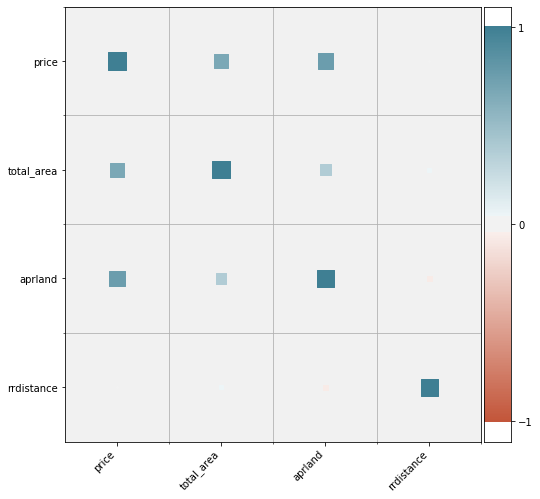

In [7]:
#Correlation between railroads to price against full dataset is non-existent
#Need to bin the datframe based on distance to railroads
from heatmap import heatmap, corrplot
plt.figure(figsize=(8,8))
corrplot(df.corr(), size_scale=300)

In [15]:
cur2 = conn.cursor()
sql2 = 'select price, total_area, volusia.sales_analysis.aprland, rrdistance from volusia.sales_analysis inner join volusia.parcel on (volusia.sales_analysis.parid = volusia.parcel.parid) where rrdistance < 5281;'
df2 = pd.read_sql_query(sql2, conn)
df2 = df2.dropna()

In [16]:
df2.head()

,price,total_area,aprland,rrdistance
0,250000.0,2068.0,119530.0,1502.084727
1,349000.0,2599.0,132379.0,1088.990081
2,1200000.0,9647.0,558900.0,2300.152863
3,300000.0,3039.0,65832.0,3746.236701
4,147500.0,2072.0,20800.0,773.959464


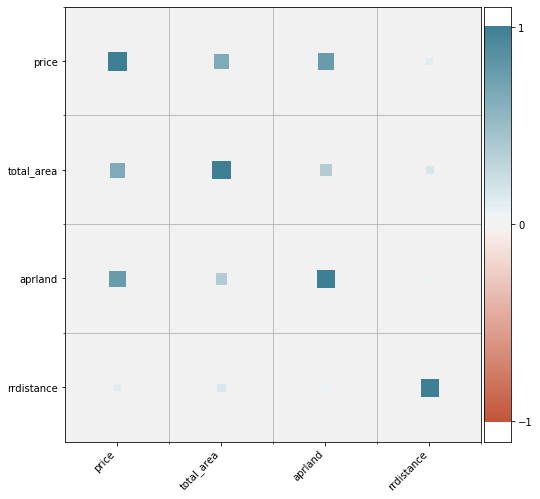

In [17]:
#Visualize correlation where parcel is within one mile of a railroad
from heatmap import heatmap, corrplot
plt.figure(figsize=(8,8))
corrplot(df2.corr(), size_scale=300)

In [18]:
#---get the top 3 features that has the highest correlation---
print(df2.corr().abs().nlargest(3, 'price').index)

#---print the top 3 correlation values---
print(df2.corr().abs().nlargest(3, 'price').values[:,3])

Index(['price', 'aprland', 'total_area'], dtype='object')
[0.11867909 0.06713829 0.16749907]


In [20]:
#Even when filtering for  within one mile rrdistance has a suprisingly low correlation
df2.corr()

,price,total_area,aprland,rrdistance
price,1.000000,0.649517,0.769320,0.118679
total_area,0.649517,1.000000,0.373053,0.167499
aprland,0.769320,0.373053,1.000000,0.067138
rrdistance,0.118679,0.167499,0.067138,1.000000
